# Hierarchical Clustering on `USArrests` dataset

## Preparing the data

Information on the dataset can be [found here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style('whitegrid')

In [18]:
arrests = pd.read_csv('../../datasets/USAressts.csv', index_col=0)
arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [19]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


## a. Cluster with complete linkage and Euclidean distance

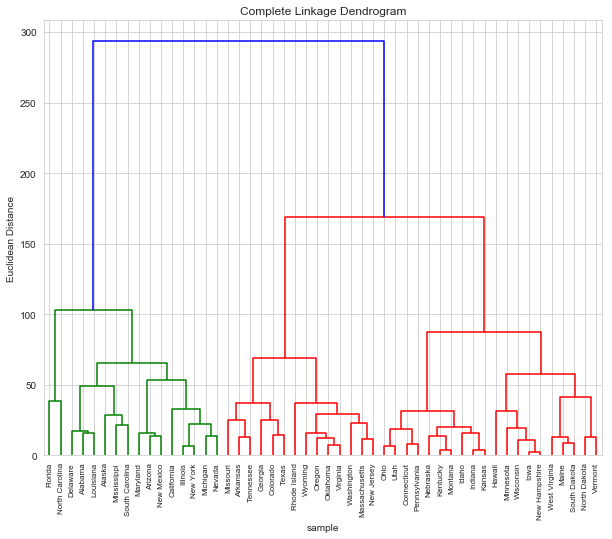

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(arrests, method='complete', metric='Euclidean')

plt.figure(figsize=(10, 8))
plt.title('Complete Linkage Dendrogram')
plt.xlabel('sample')
plt.ylabel('Euclidean Distance')
d_1 = dendrogram(Z, labels=arrests.index, leaf_rotation=90)

## b. Cut dendrogram to get 3 clusters

The clusters are

In [29]:
cluster_1 = d_1['ivl'][:d_1['ivl'].index('Nevada') + 1]
cluster_1

['Florida',
 'North Carolina',
 'Delaware',
 'Alabama',
 'Louisiana',
 'Alaska',
 'Mississippi',
 'South Carolina',
 'Maryland',
 'Arizona',
 'New Mexico',
 'California',
 'Illinois',
 'New York',
 'Michigan',
 'Nevada']

In [31]:
cluster_2 = d_!['ivl'][d_1['ivl'].index('Nevada') + 1: d_1['ivl'].index('New Jersey') + 1]
cluster_2

['Missouri',
 'Arkansas',
 'Tennessee',
 'Georgia',
 'Colorado',
 'Texas',
 'Rhode Island',
 'Wyoming',
 'Oregon',
 'Oklahoma',
 'Virginia',
 'Washington',
 'Massachusetts',
 'New Jersey']

In [32]:
cluster_3 = d_1['ivl'][d_1['ivl'].index('New Jersey') + 1 :]
cluster_3

['Ohio',
 'Utah',
 'Connecticut',
 'Pennsylvania',
 'Nebraska',
 'Kentucky',
 'Montana',
 'Idaho',
 'Indiana',
 'Kansas',
 'Hawaii',
 'Minnesota',
 'Wisconsin',
 'Iowa',
 'New Hampshire',
 'West Virginia',
 'Maine',
 'South Dakota',
 'North Dakota',
 'Vermont']

## c. Repeat clustering after scaling

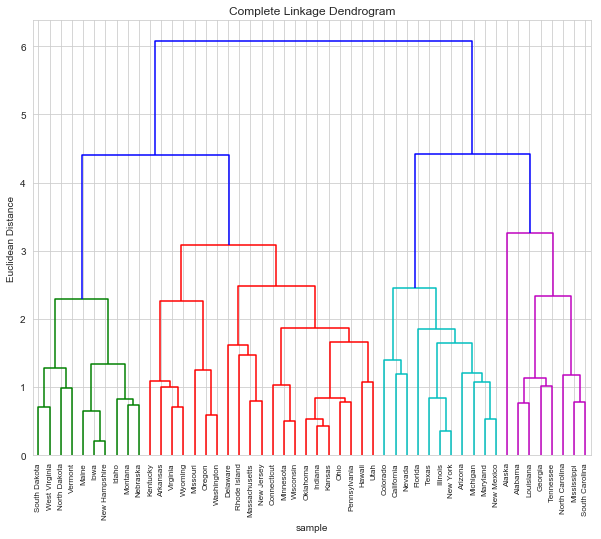

In [33]:
arrests_sc = arrests/arrests.std()

Z = linkage(arrests_sc, method='complete', metric='Euclidean')

plt.figure(figsize=(10, 8))
plt.title('Complete Linkage Dendrogram')
plt.xlabel('sample')
plt.ylabel('Euclidean Distance')
d_2 = dendrogram(Z, labels=arrests_sc.index, leaf_rotation=90)

## d. What effect does scaling have?

Scaling seemingly results in a more "balanced" clustering. In general we know that data should be scaled if variables are measured on incomparable scales (see conceptual exercise 5 for an example). In this case, while `Murder`, `Assault` and `Rape` are measured in the same units, `Urban` is measured in a percentage. 

Thus we conclude the data should be scaled bofore clustering in this case.